In [26]:
import matplotlib
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
import geopy as gp
from geopy.geocoders import Nominatim
from geopy.point import Point


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.subplots as sp

In [27]:
df=pd.read_csv("makemytrip.csv",error_bad_lines=False)
df

b'Skipping line 2269: expected 33 fields, saw 52\n'


,area,city,country,crawl_date,highlight_value,hotel_overview,hotel_star_rating,image_urls,in_your_room,is_value_plus,...,property_type,qts,query_time_stamp,room_types,site_review_count,site_review_rating,sitename,state,traveller_rating,uniq_id
0,Hardasji Ki Magri,Udaipur,India,2016-06-21,{{facility}},|Zion Home Stay is located in a city that sets...,1 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,78ddf880bd7937d384ff278cc5b39d6e
1,Near Nai Gaon,Udaipur,India,2016-06-21,{{facility}},| Araliayas Resorts is a 3 star hotel located ...,3 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,4.5,makemytrip,NaN,NaN,9f9f9cbb2f7df8089b63d5cdeb257944
2,Near Bagore Ki Haveli,Udaipur,India,2016-06-21,{{facility}},|A 2 star property is located at 24 km from Ma...,2 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,NaN,makemytrip,NaN,NaN,b314bb7fa8bfb1ed306f517be21d729e
3,Dabok,Udaipur,India,2016-06-21,Airport Transfer|Car rental|Conference Hall|Cu...,|SNP House Airport Hotel And Restaurant is loa...,1 star,//imghtlak.mmtcdn.com/images/hotels/2014071815...,NaN,no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,`standard,/5,NaN,makemytrip,NaN,NaN,e6f5bb3c2d76a78d978b9ceb0e31ec56
4,East Udaipur,Udaipur,India,2016-06-21,{{facility}},| Hotel Pichola Haveli is situated in the beau...,2 star,NaN,{{value}},no,...,Hotel,NaN,2016-06-21 04:06:50 +0000,NaN,/5,3.7,makemytrip,NaN,NaN,63072c301427b6ca450d31eea127bcf0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20041,"Thonichal, Mananthavady",Wayanad,India,NaN,Conference Hall|Doctor on Call|Room Service|Tr...,"|Abhirami Farm Resorts is a budget property, s...",1 star,//imghtlak.mmtcdn.com/images/hotels/2014121816...,Telephone | Bathroom Toiletries | Television |...,no,...,Hotel,NaN,2016-04-17 11:08:24 +0000,Cottage (Standard Cottage),NaN,NaN,makemytrip,NaN,NaN,f3c6e1f4c4d37a4193f6446d3421c0d4
20042,NaN,Varanasi,India,NaN,24 Hour Doctor On Call.|Laundry Service (At a ...,"|Located in the Holy City of Varanasi, Hotel G...",1 star,//imghtlak.mmtcdn.com/images/hotels/2014102213...,NaN,no,...,Lodge,NaN,2016-04-17 11:08:24 +0000,Ac Single Room|Ac Double Room,NaN,NaN,makemytrip,NaN,Location:4/5 | Hospitality:2/5 | Facilities:3/...,51760b0acd99c150c6d64584cf029542
20043,"Central Mysore,Nazarbad Road",WeekendGetawaysAroundChennai,India,NaN,Airport/Rlwy Stn Transfer|Business Centre|Conf...,|Ginger Hotel is nestled in Mysore which is ca...,3 star,//imghtlak.mmtcdn.com/images/hotels/2007011716...,Electronic Key | Tea/Coffee Maker | Telephone ...,no,...,Hotel,NaN,2016-04-17 11:08:24 +0000,Single|Double,NaN,NaN,makemytrip,NaN,Location:4.4/5 | Hospitality:4.1/5 | Facilitie...,26791dbfec7bf141a326fcc169841596
20044,Wayanad,Wayanad,India,NaN,NaN,"Homestay is situated at Korram, in Wayanad Dis...",1 star,http://www.tripvillas.com/media/origin/1049657...,Television | Linen Provided | Hot Water | Show...,no,...,Hotel,NaN,2016-04-17 11:08:24 +0000,Standard Room,NaN,NaN,makemytrip,NaN,NaN,6a862c717678f0e6cfcd1e3daa28e31d


In [28]:
numberofrows_1, numberofcolumns_1 = df.shape
print('There are {} rows and {} columns'.format(numberofrows_1, numberofcolumns_1)+' in our Hotels on MakeMyTrip dataset.')

There are 20046 rows and 33 columns in our Hotels on MakeMyTrip dataset.


In [29]:
print("duplicated Value count",df.duplicated().sum())
analys = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
    
})
display(analys)

duplicated Value count 2210


,Unique,Null,NullPercent,Type
area,6514,5324,0.265589,object
city,756,0,0.000000,object
country,1,458,0.022847,object
crawl_date,25,9349,0.466377,object
highlight_value,8127,2372,0.118328,object
hotel_overview,11493,3354,0.167315,object
hotel_star_rating,15,0,0.000000,object
image_urls,6711,11446,0.570987,object
in_your_room,5571,5350,0.266886,object
is_value_plus,2,0,0.000000,object


In [30]:
df.describe()

,latitude,longitude,mmt_holidayiq_review_count,mmt_review_count,mmt_review_score,mmt_tripadvisor_count,site_review_rating
count,20025.000000,20025.000000,9412.000000,9378.000000,9772.000000,11158.000000,554.000000
mean,16.599395,59.361278,16.079473,21.722755,3.549703,86.025542,3.723105
std,11.451424,32.882361,55.103689,50.252356,1.286918,194.107539,1.004352
min,-8.744480,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,9.602654,72.560005,0.000000,0.000000,3.300000,7.000000,3.400000
50%,17.470844,75.853006,0.000000,4.000000,3.900000,24.000000,3.950000
75%,26.914160,77.617093,10.000000,20.750000,4.300000,77.000000,4.300000
max,80.162362,130.000000,1230.000000,1335.000000,5.000000,4481.000000,5.000000


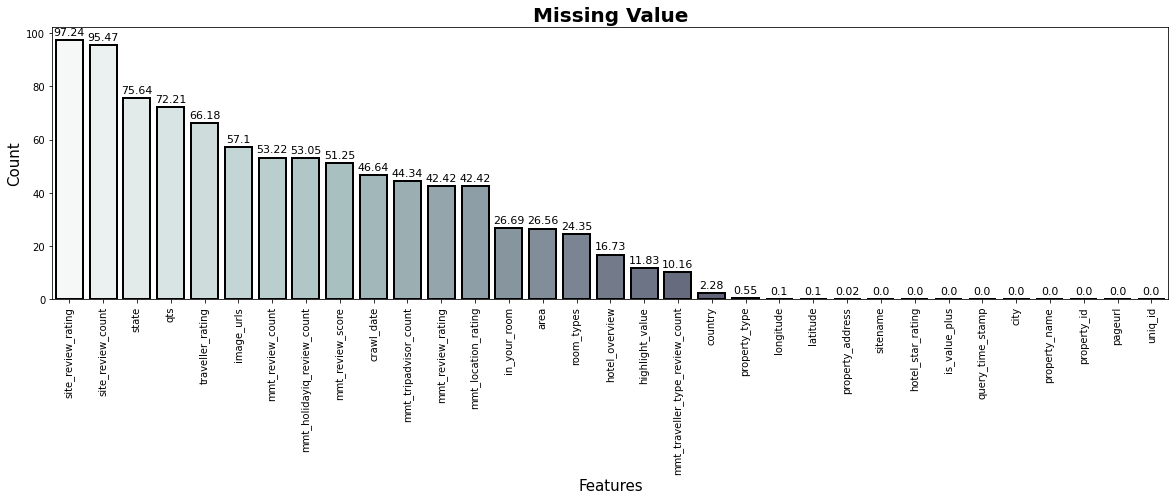

In [31]:
Value_Missing = df.isnull().sum().sort_values(ascending = False)
percent_missing = (df.isnull().sum() * 100 / len(df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (20, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0,3), textcoords = 'offset points')
cplot.set_title('Missing Value', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

In [32]:
perc = 50.0 # Like N %
min_count =  int(((100-50)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)

In [33]:
df.isnull().sum()

area                               5324
city                                  0
country                             458
crawl_date                         9349
highlight_value                    2372
hotel_overview                     3354
hotel_star_rating                     0
in_your_room                       5350
is_value_plus                         0
latitude                             21
longitude                            21
mmt_location_rating                8503
mmt_review_rating                  8503
mmt_traveller_type_review_count    2037
mmt_tripadvisor_count              8888
pageurl                               0
property_address                      4
property_id                           0
property_name                         0
property_type                       110
query_time_stamp                      0
room_types                         4881
sitename                              0
uniq_id                               0
dtype: int64

In [34]:
df = pd.DataFrame({'highlight_value', 'crawl_date','hotel_overview','site_name'})
df = df.drop(['highlight_value', 'crawl_date','hotel_overview','site_name'], axis=1)

KeyError: "['highlight_value' 'crawl_date' 'hotel_overview' 'site_name'] not found in axis"